# テーブルデータ学習済みモデル推論テンプレート

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font="IPAexGothic")
import lightgbm as lgb

from pathlib import Path
from lib.metrics import CalcMetrics

In [3]:
DATASET_DIR='./dataset'
MODEL_DIR='./models'

## データセットの読み込み

前処理後のpickle化されたデータを読み込む

In [4]:
with open(Path(DATASET_DIR, 'train.pickle'), mode="rb") as f:
    train_data = pickle.load(f)
    train_x = train_data['features']
    train_y = train_data['target']

with open(Path(DATASET_DIR, 'test.pickle'), mode="rb") as f:
    test_data = pickle.load(f)
    test_x = test_data['features']
    test_y = test_data['target']

In [5]:
train_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81
...,...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93


In [6]:
train_y

,TARGET
1989,0.475
256,1.000
7887,2.858
4581,1.750
1993,0.592
...,...
13123,1.446
19648,1.594
9845,2.893
10799,4.846


In [7]:
test_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
19681,3.0962,36.0,4.746421,0.930470,1168.0,2.388548,39.15,-121.62
12156,4.1386,2.0,8.821216,1.414779,2826.0,3.368296,33.66,-117.17
10211,7.8750,30.0,7.550926,0.981481,523.0,2.421296,33.89,-117.91
2445,2.0658,34.0,5.938144,1.206186,363.0,3.742268,36.56,-119.64


In [8]:
test_y

,TARGET
14740,1.369
10101,2.413
20566,2.007
2670,0.725
15709,4.600
...,...
19681,0.740
12156,1.773
10211,3.519
2445,0.925


## 学習済みモデルのロードと推論

In [9]:
with open(Path(MODEL_DIR, 'lightgbm_model.pickle'), mode="rb") as f:
    model = pickle.load(f)

### 特徴量の重要度を表示

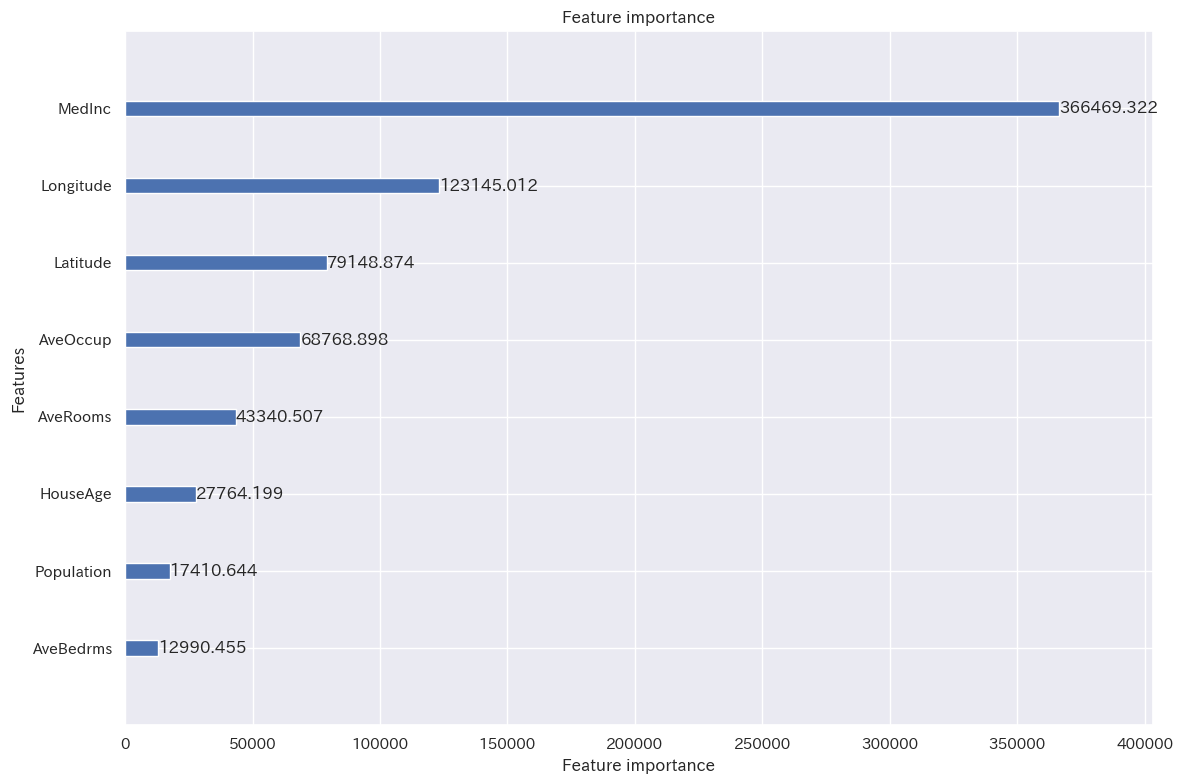

In [10]:
lgb.plot_importance(model, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()
plt.close()

## Calculate Metrics

In [11]:
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

In [12]:
train_metrics = CalcMetrics(train_y, train_pred)
test_metrics = CalcMetrics(test_y, test_pred)

### MAE

In [13]:
print(f'MAE train data: {train_metrics.mae:.3f}')
print(f'MAE test data: {test_metrics.mae:.3f}')

MAE train data: 0.216
MAE test data: 0.297


### MSE

In [14]:
print(f'MSE train data: {train_metrics.mse:.3f}')
print(f'MSE test data: {test_metrics.mse:.3f}')

MSE train data: 0.096
MSE test data: 0.201


### R2 Score

In [15]:
print(f'R2 train data: {train_metrics.r2_score:.3f}')
print(f'R2 test data: {test_metrics.r2_score:.3f}')

R2 train data: 0.917
R2 test data: 0.820
